# Cleaning data and the skies

## 📖 Background
Your are a data analyst at an environmental company. Your task is to evaluate ozone pollution across various regions.

You’ve obtained data from the U.S. Environmental Protection Agency (EPA), containing daily ozone measurements at monitoring stations across California. However, like many real-world datasets, it’s far from clean: there are missing values, inconsistent formats, potential duplicates, and outliers.

Before you can provide meaningful insights, you must clean and validate the data. Only then can you analyze it to uncover trends, identify high-risk regions, and assess where policy interventions are most urgently needed.

## 💾 The data
The data is a modified dataset from the U.S. Environmental Protection Agency ([EPA](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)). 

#### Ozone contains the daily air quality summary statistics by monitor for the state of California for 2024. Each row contains the date and the air quality metrics per collection method and site
- "Date" - the calendar date with which the air quality values are associated
- "Source" - the data source: EPA's Air Quality System (AQS), or Airnow reports
- "Site ID" - the id for the air monitoring site
- "POC" - the id number for the monitor
- "Daily Max 8-hour Ozone Concentration" - the highest 8-hour value of the day for ozone concentration
- "Units" - parts per million by volume (ppm)
- "Daily AQI Value" - the highest air quality index value for the day, telling how clean or polluted the air is (a value of 50 represents good air quality, while a value above 300 is hazardous)
- "Local Site Name" - name of the monitoring site
- "Daily Obs Count" - number of observations reported in that day
- "Percent Complete" - indicates whether all expected samples were collected
- "Method Code" - identifier for the collection method
- "CBSA Code" - identifier for the core base statistical area (CBSA)
- "CBSA Name" - name of the core base statistical area
- "State FIPS Code" - identifier for the state
- "State" - name of the state
- "County FIPS Code" - identifer for the county
- "County" - name of the county
- "Site Latitude" - latitude coordinates of the site
- "Site Longitude" - longitude coordinates of the side

In [2]:
library(readr)
ozone <- read_csv('data/ozone.csv', show_col_types = FALSE)
head(ozone)

Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
/2024,AQS,60010007,1,0.031,ppm,29,Livermore,17,100,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.68753,-121.7842
01/02/2024,AQS,60010007,1,0.037,ppm,34,Livermore,17,100,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.68753,-121.7842
/2024,AQS,60010007,1,NA,ppm,30,Livermore,17,100,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.68753,-121.7842
January 04/2024,AQS,60010007,1,0.026,ppm,24,Livermore,17,100,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.68753,-121.7842
January 05/2024,AQS,60010007,1,0.027,ppm,25,Livermore,17,100,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.68753,-121.7842
January 06/2024,AQS,60010007,1,0.031,ppm,29,Livermore,17,100,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.68753,-121.7842


In [3]:
library(tidyverse)
library(ggplot2)
library(forcats)
install.packages("anytime")

library(anytime)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Downloading packages -------------------------------------------------------
- Downloading anytime from CRAN ...             OK [251.9 Kb in 0.32s]
Successfully downloaded 1 package in 1.1 seconds.

The following package(s) will be installed:
- anytime [0.3.12]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing anytime ...                        OK [installed binary and cached in 0.75s]


# Data Cleaning
Before we get started we need to clean our data. From the peek at the dataset above we can already see that we have some issues with the `Date` column as well as some issues with the `"Daily Max 8-hour Ozone Concentration"`column.

In [29]:
glimpse(ozone)

Rows: 54,759
Columns: 17
$ Date                                   <chr> "/2024", "01/02/2024", "/2024",…
$ Source                                 <chr> "AQS", "AQS", "AQS", "AQS", "AQ…
$ `Site ID`                              <dbl> 60010007, 60010007, 60010007, 6…
$ POC                                    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ `Daily Max 8-hour Ozone Concentration` <dbl> 0.031, 0.037, NA, 0.026, 0.027,…
$ Units                                  <chr> "ppm", "ppm", "ppm", "ppm", "pp…
$ `Daily AQI Value`                      <dbl> 29, 34, 30, 24, 25, 29, 28, 25,…
$ `Local Site Name`                      <chr> "Livermore", "Livermore", "Live…
$ `Daily Obs Count`                      <dbl> 17, 17, 17, 17, 17, 17, 17, 17,…
$ `Percent Complete`                     <dbl> 100, 100, 100, 100, 100, 100, 1…
$ `Method Code`                          <dbl> 47, 47, 47, 47, 47, 47, 47, 47,…
$ `CBSA Code`                            <dbl> 41860, 41860, 41860, 41860, 418…
$ `CBSA Name`  

## Variable - Dates

In [12]:
ozone_dates <- ozone %>%
	select(Date) %>%
	unique() %>%
	mutate(new_date = anytime(Date))

ozone_dates

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `new_date = anytime(Date)`.
Caused by warning in `anytime_cpp()`:
! Input conversion of '/2024' resulted in 'NA' results.”


Date,new_date
<chr>,<dttm>
/2024,NA
01/02/2024,2024-01-02
January 04/2024,2024-01-04
January 05/2024,2024-01-05
January 06/2024,2024-01-06
01/07/2024,2024-01-07
January 10/2024,2024-01-10
January 11/2024,2024-01-11
January 12/2024,2024-01-12


Using the anytime package we can easily parse multiple date formats and see which ones are truly "invalid"

## Variable - SiteID

In [7]:
ozone_siteid <- ozone %>%
	select(`Site ID`) %>%
	unique()

ozone_siteid

    Site ID        
 Min.   :60010007  
 1st Qu.:60311004  
 Median :60655001  
 Mean   :60590863  
 3rd Qu.:60811001  
 Max.   :61131003  

## Variable - POC

In [6]:
ozone_poc <- ozone %>%
	select(POC) %>%
	unique()

ozone_poc

POC
<dbl>
1
2


## Variable - Daily Max 8-hour Ozone Concentration

In [42]:
ozone_conc <- ozone %>%
	rename(ozone_concentration = 'Daily Max 8-hour Ozone Concentration') %>%
	select(ozone_concentration) %>%
	summary()

ozone_conc

 ozone_concentration
 Min.   :0.0000     
 1st Qu.:0.0340     
 Median :0.0410     
 Mean   :0.0435     
 3rd Qu.:0.0520     
 Max.   :0.1390     
 NA's   :2738       

## Variable - Units

In [40]:
ozone %>%
	select(Units) %>%
	unique()

Units
<chr>
ppm


## Variable - Daily AQI Value

 Daily AQI Value 
 Min.   :  0.00  
 1st Qu.: 31.00  
 Median : 38.00  
 Mean   : 45.28  
 3rd Qu.: 48.00  
 Max.   :236.00  
 NA's   :2738    

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2738 rows containing non-finite outside the scale range (`stat_bin()`).”


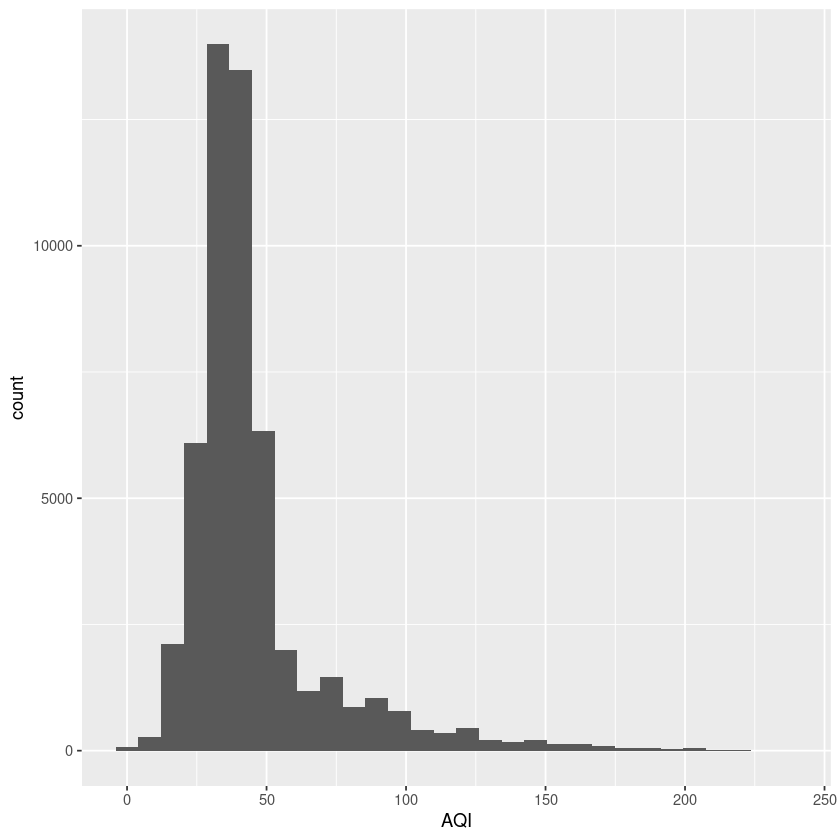

In [9]:
ozone_aqi <- ozone %>%
	select(`Daily AQI Value`) %>%
	summary()

ozone_aqi 
ozone %>%
rename(AQI = 'Daily AQI Value') %>%
ggplot(aes(x = AQI)) +
	geom_histogram()



## Variable - Local Site Name

In [11]:
ozone_loc_site <- ozone %>%
	select('Local Site Name') %>%
	unique()

ozone_loc_site

Local Site Name
<chr>
Livermore
Oakland
Oakland West
Berkeley- Aquatic Park
Livermore Portola
Hayward
Jackson-Clinton Road
Chico-East Avenue
Paradise-Clark


## Variable - Daily Obs Count

 Daily Obs Count  
 Min.   :   1.00  
 1st Qu.:  17.00  
 Median :  17.00  
 Mean   :  27.53  
 3rd Qu.:  17.00  
 Max.   :1000.00  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


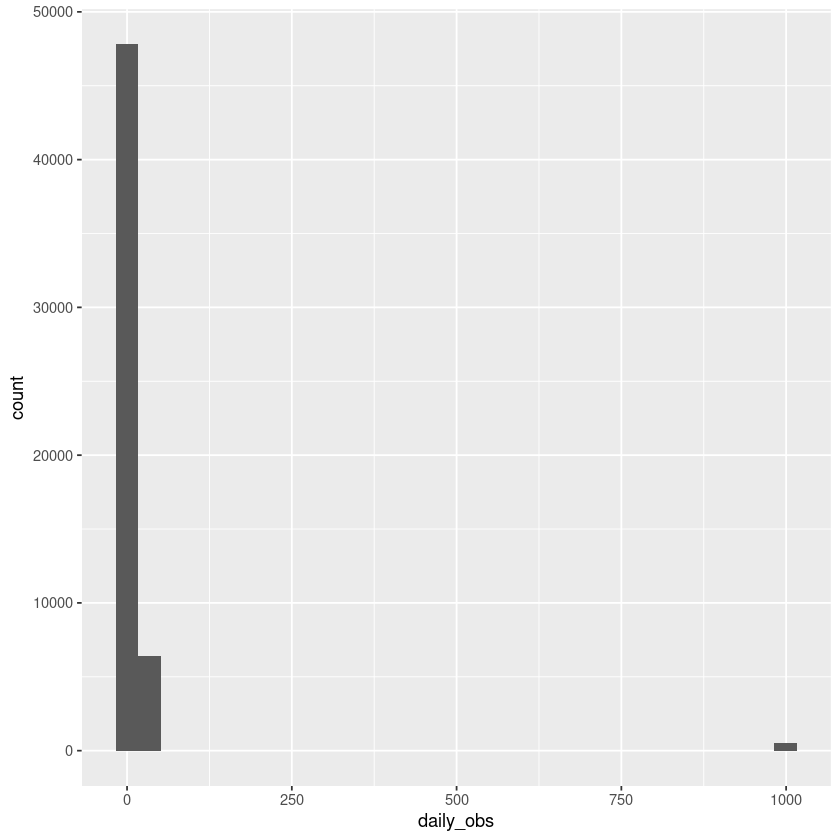

In [14]:
ozone_obs_cnt <- ozone %>%
	select('Daily Obs Count') %>%
	summary()

ozone_obs_cnt

ozone %>% rename(daily_obs = 'Daily Obs Count') %>%
ggplot(aes(x = daily_obs)) +
	geom_histogram()
	

In [18]:
ozone %>%
	filter(`Daily Obs Count` > 999.00) %>%
	View() #it seems that 1000 is a valid number of observations which is...odd

Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
/2024,AirNow,60010009,1,0.038,ppm,35,Oakland,1000,100,NA,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.74307,-122.1699
06/09/2024,AirNow,60010009,1,0.032,ppm,30,Oakland,1000,100,NA,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.74307,-122.1699
February 17/2024,AQS,60010011,1,0.026,ppm,24,Oakland West,1000,100,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.81478,-122.2823
03/17/2024,AirNow,60010011,1,0.034,ppm,31,Oakland West,1000,100,NA,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.81478,-122.2823
/2024,AirNow,60010011,1,0.049,ppm,45,Oakland West,1000,100,NA,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.81478,-122.2823
April 16/2024,AirNow,60010011,1,0.030,ppm,28,Oakland West,1000,100,NA,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.81478,-122.2823
May 07/2024,AirNow,60010011,1,0.036,ppm,33,Oakland West,1000,100,NA,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.81478,-122.2823
08/19/2024,AirNow,60010011,1,0.027,ppm,25,Oakland West,1000,100,NA,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.81478,-122.2823
09/12/2024,AirNow,60010011,1,0.022,ppm,20,Oakland West,1000,100,NA,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.81478,-122.2823


## Variable - Percent Complete

In [24]:
ozone %>% 
	select(`Percent Complete`) %>%
	summary()

 Percent Complete
 Min.   :  6.00  
 1st Qu.:100.00  
 Median :100.00  
 Mean   : 99.34  
 3rd Qu.:100.00  
 Max.   :100.00  

## Variable - Method Code

In [25]:
ozone %>%
	select(`Method Code`) %>%
	unique()

Method Code
<dbl>
47
NA
87
199
53


## Variable - CSBA Code

In [12]:
ozone %>% 
	select(`CBSA Code`) %>%
	unique()

CBSA Code
<dbl>
41860
NA
17020
40900
23420
21700
20940
13860
12540


## Variable - CSBA Name

In [11]:
ozone %>% 
	select(`CBSA Name`) %>%
	unique()

CBSA Name
<chr>
"San Francisco-Oakland-Hayward, CA"
NA
"Chico, CA"
"Sacramento--Roseville--Arden-Arcade, CA"
"Fresno, CA"
"Eureka-Arcata-Fortuna, CA"
"El Centro, CA"
"Bishop, CA"
"Bakersfield, CA"


## Variable - State FIPS Code
Does not exist in data set. Mostly likely because this is all California data and thus redundant.

## Variable - State
Does not exist in data set. Mostly likely because this is all California data and thus redundant.

In [15]:
colnames(ozone)

[1] "Date"                                
 [2] "Source"                              
 [3] "Site ID"                             
 [4] "POC"                                 
 [5] "Daily Max 8-hour Ozone Concentration"
 [6] "Units"                               
 [7] "Daily AQI Value"                     
 [8] "Local Site Name"                     
 [9] "Daily Obs Count"                     
[10] "Percent Complete"                    
[11] "Method Code"                         
[12] "CBSA Code"                           
[13] "CBSA Name"                           
[14] "County FIPS Code"                    
[15] "County"                              
[16] "Site Latitude"                       
[17] "Site Longitude"

## Variable - County FIPS Code

In [16]:
ozone_county_code <- ozone %>%
	select('County FIPS Code') %>%
	unique()

ozone_county_code

County FIPS Code
<dbl>
1
5
7
9
11
13
17
19
21


## Variable - County

In [17]:
ozone_county <- ozone %>%
	select(County) %>%
	unique()

ozone_county

County
<chr>
Alameda
Amador
Butte
Calaveras
Colusa
Contra Costa
El Dorado
Fresno
Glenn


In [22]:
# Verifying that LA == Los Angeles and SF == San Franscisco by checking that they use the same county code
ozone_county_pair <- ozone %>%
	rename(county_code = 'County FIPS Code') %>%
	mutate(county_code_pair = paste(county_code, County, sep = ":")) %>%
	select(county_code_pair) %>%
	unique()

#They do, so we can recode LA as Los Angeles in this data set and instances of SF as San Franscisco
ozone_county_pair

county_code_pair
<chr>
1:Alameda
5:Amador
7:Butte
9:Calaveras
11:Colusa
13:Contra Costa
17:El Dorado
19:Fresno
21:Glenn


## Variable - Site Longitude

In [22]:
ozone_long <- ozone %>%
	select(`Site Longitude`) %>%
	summary()

ozone_long

 Site Longitude  
 Min.   :-124.2  
 1st Qu.:-121.4  
 Median :-119.8  
 Mean   :-119.7  
 3rd Qu.:-118.1  
 Max.   :-114.6  

## Variable - Site Latitude

In [20]:
ozone_lat <- ozone %>%
	select(`Site Latitude`) %>%
	summary()

ozone_lat

 Site Latitude  
 Min.   :32.58  
 1st Qu.:34.18  
 Median :36.21  
 Mean   :36.17  
 3rd Qu.:37.96  
 Max.   :41.73  

# New Variables

In [45]:
 ozone %>%
 	mutate(clean_date = anytime(Date), day_of_the_week = wday(clean_date, label =TRUE), is_weekend = ifelse(day_of_the_week %in% c("Sat","Sun"), "Y", "N")) %>%
	select(clean_date, day_of_the_week, is_weekend) %>%
	head()


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `clean_date = anytime(Date)`.
Caused by warning in `anytime_cpp()`:
! Input conversion of '/2024' resulted in 'NA' results.”


clean_date,day_of_the_week,is_weekend
<dttm>,<ord>,<chr>
NA,NA,N
2024-01-02,Tue,N
NA,NA,N
2024-01-04,Thu,N
2024-01-05,Fri,N
2024-01-06,Sat,Y


## Cleaning Script

In [13]:
ozone_cleaned <- ozone %>%
    rename(site_id =`Site ID`,                                  
		   daily_max_8hr_ozone_conc =`Daily Max 8-hour Ozone Concentration`,
		   daily_AQI =`Daily AQI Value`,                      
		   local_site_name = `Local Site Name`,
		   daily_obs_count = `Daily Obs Count`, 
		   percent_complete =`Percent Complete`,
		   method_code = `Method Code`,
		   CSBA_code = `CBSA Code`,
		   CSBA_name = `CBSA Name`,
		   county_FIPS_code = `County FIPS Code`,                     
		   county = County,
		   site_latitude = `Site Latitude`,
		   site_longitude =`Site Longitude`) %>%
	mutate(Date = anytime(Date),
		   site_id = as.factor(site_id),
		   POC = as.factor(POC),
		   local_site_name = as.factor(local_site_name),
		   CSBA_code = as.factor(CSBA_code),
		   CSBA_name = as.factor(CSBA_name), 
		   county_FIPS_code = as.factor(county_FIPS_code),
		   county = as.factor(county))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Date = anytime(Date)`.
Caused by warning in `anytime_cpp()`:
! Input conversion of '/2024' resulted in 'NA' results.”


In [8]:
glimpse(ozone_cleaned)

Rows: 54,759
Columns: 17
$ Date                     <dttm> NA, 2024-01-02, NA, 2024-01-04, 2024-01-05, …
$ Source                   <chr> "AQS", "AQS", "AQS", "AQS", "AQS", "AQS", "AQ…
$ site_id                  <dbl> 60010007, 60010007, 60010007, 60010007, 60010…
$ POC                      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ daily_max_8hr_ozone_conc <dbl> 0.031, 0.037, NA, 0.026, 0.027, 0.031, 0.030,…
$ Units                    <chr> "ppm", "ppm", "ppm", "ppm", "ppm", "ppm", "pp…
$ daily_AQI                <dbl> 29, 34, 30, 24, 25, 29, 28, 25, 31, 33, 29, 2…
$ local_site_name          <chr> "Livermore", "Livermore", "Livermore", "Liver…
$ daily_obs_count          <dbl> 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1…
$ percent_complete         <dbl> 100, 100, 100, 100, 100, 100, 100, 100, 100, …
$ method_code              <dbl> 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 4…
$ CSBA_code                <dbl> 41860, 41860, 41860, 41860, 41860, 41860, 418…
$ CSBA_name    

## 💪 Competition challenge

Create a report that covers the following:
1. Your EDA and data cleaning process.
2. How does daily maximum 8-hour ozone concentration vary over time and regions?
3. Are there any areas that consistently show high ozone concentrations? Do different methods report different ozone levels?
4. Consider if urban activity (weekend vs. weekday) has any affect on ozone levels across different days.
5. Bonus: plot a geospatial heatmap showing any high ozone concentrations.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!